In [5]:
import numpy as np
import tensorflow as tf
import glob
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

import data_visualization
import mnist_m_gen

## Overview of the MNIST and MNIST-m dataset

In [6]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [7]:
minist_m_gen = mnist_m_gen.mnist_m_generator('./images/train/*.jpg', './images/test/*.jpg')
minist_m_xtrain, minist_m_xtest = minist_m_gen.create_mnistm(x_train, x_test)

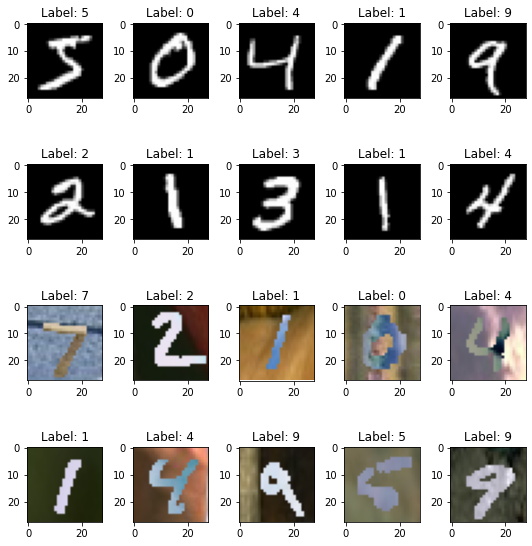

In [8]:
num_row = 4
num_col = 5
num = 10
images = x_train[:num]
labels = y_train[:num]

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))


images = minist_m_xtest[:num]
labels = y_test[:num]
for i in range(10,20):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i - 10], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i - 10]))
plt.tight_layout()
plt.show()

## Project Mnist and MNIST-m to 3d using tsne method

In [9]:
mnist_tranformed_data = data_visualization.tsne(x_train, 3, 0.1, type = "mnist")
mnist_m_tranformed_data = data_visualization.tsne(minist_m_xtrain, 3, 0.1,  type = "mnist-m")

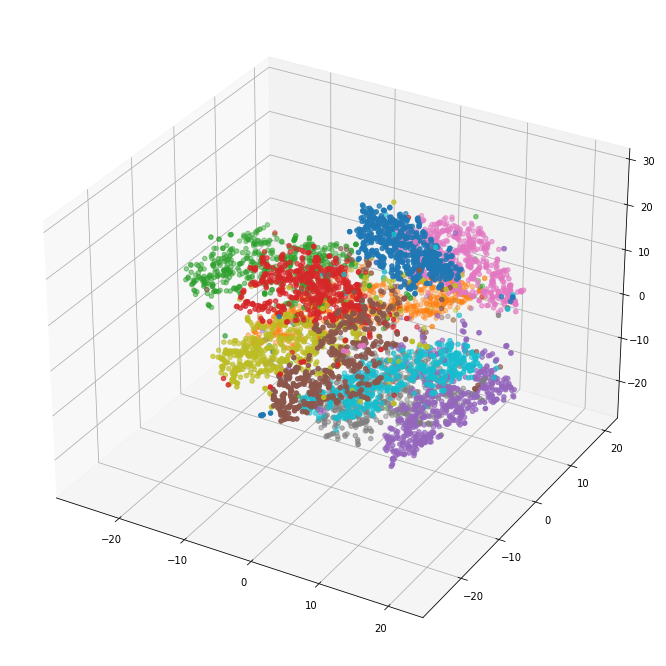

In [10]:
data_visualization.plot_info(mnist_tranformed_data, y_train, 3)

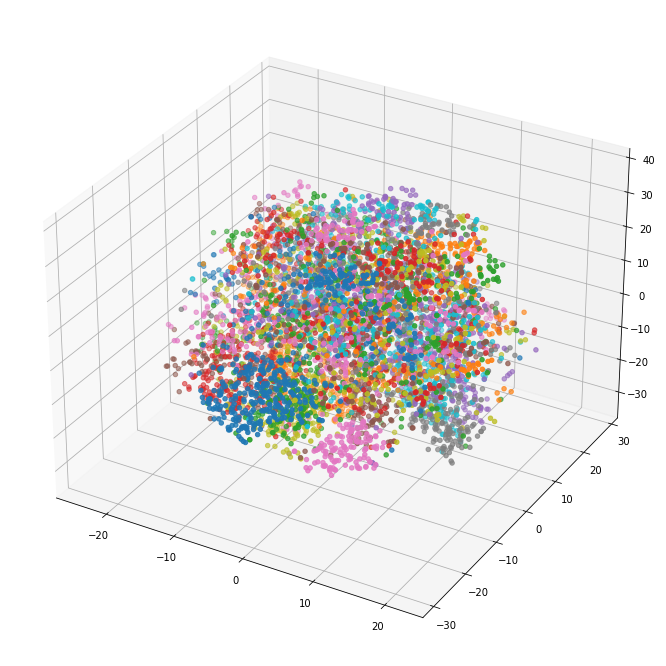

In [11]:
data_visualization.plot_info(mnist_m_tranformed_data, y_train, 3)

## Project Mnist and MNIST-m to 2d using tsne method

In [12]:
mnist_tranformed_data_2d = data_visualization.tsne(x_train, 2, 0.1, type = "mnist")
mnist_m_tranformed_data_2d = data_visualization.tsne(minist_m_xtrain, 2, 0.1, type = "mnist-m")

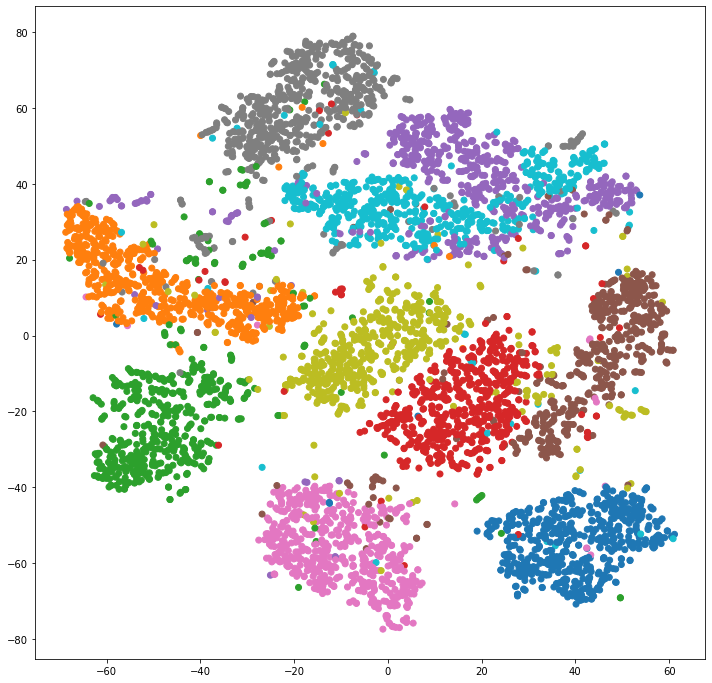

In [13]:
data_visualization.plot_info(mnist_tranformed_data_2d, y_train, 2)

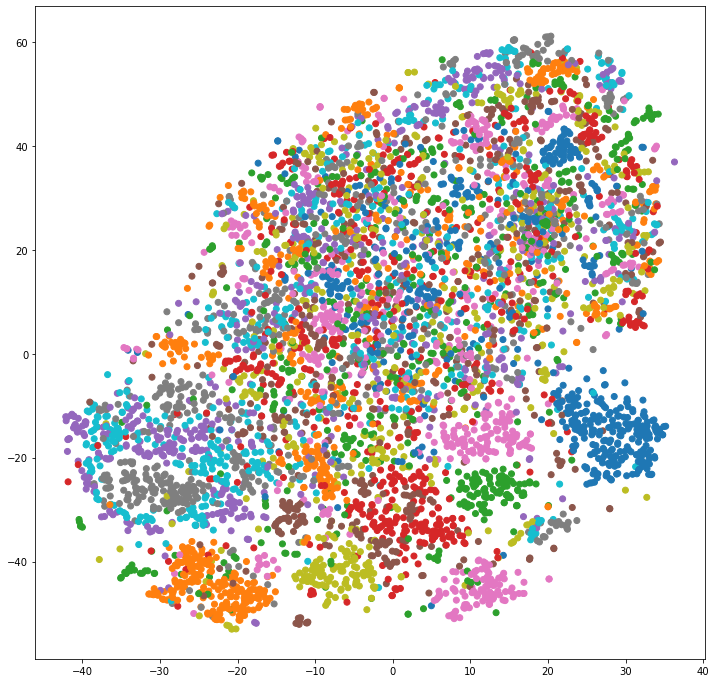

In [14]:
data_visualization.plot_info(mnist_m_tranformed_data_2d, y_train, 2)

In [15]:
'''import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
import cv2

class VGG_11(object):
    def __init__(self, learning_rate):
        model = Sequential()
        model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32 ,1)))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
        model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
        model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
        model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Flatten())

        model.add(Dense(4096, activation='relu'))
        model.add(Dense(4096, activation='relu'))
        model.add(Dense(1000, activation='relu'))
        model.add(Dense(10, activation='softmax'))

        model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

        self.model = model

    def fit(self, X_train, Y_train, X_test, Y_test):
        self.model.fit(X_train, Y_train, batch_size=256, epochs=5, verbose=1, validation_data=(X_test, Y_test))

X_train = []
X_test = []
for i in range(len(x_train)):
  X_train.append(cv2.resize(x_train[i], (32,32)))

for i in range(len(x_test)):
  X_test.append(cv2.resize(x_test[i], (32,32)))

X_train = np.array(X_train)
X_test = np.array(X_test)


X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

y_train.shape

vgg_11_net = VGG_11(learning_rate=0.0001)
vgg_11_net.fit(X_train, y_train,X_test, y_test)'''


"import keras\nfrom keras.models import Sequential\nfrom keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D\nimport cv2\n\nclass VGG_11(object):\n    def __init__(self, learning_rate):\n        model = Sequential()\n        model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32 ,1)))\n        model.add(MaxPooling2D(pool_size=(2, 2)))\n        model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))\n        model.add(MaxPooling2D(pool_size=(2, 2)))\n        model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))\n        model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))\n        model.add(MaxPooling2D(pool_size=(2, 2)))\n        model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))\n        model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))\n        model.add(MaxPooling2D(pool_size=(2, 2)))\n        model.add(Conv2D(512, (3, 3), activation='relu', padding='s